# Face and Text Recognition Project


In [5]:
import zipfile

import PIL
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import os

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')


File Name                                             Modified             Size
a-0.png                                        2019-02-26 22:30:30     21000053
a-1.png                                        2019-02-26 22:30:28     22598429
a-2.png                                        2019-02-26 22:30:28      3650049
a-3.png                                        2019-02-26 22:30:30     18646538
Extracting all the files now...
Done!
Word not found in file
Word not found in file


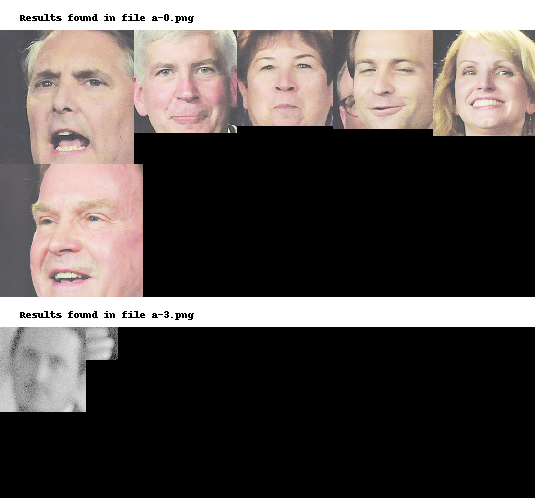

File Name                                             Modified             Size
a-0.png                                        2019-01-06 14:44:26     21000053
a-1.png                                        2019-01-06 14:44:30     22598429
a-10.png                                       2019-01-06 14:45:14     18166003
a-11.png                                       2019-01-06 14:45:14      7458745
a-12.png                                       2019-01-06 14:45:16      2421677
a-13.png                                       2019-01-06 14:45:20     26822842
a-2.png                                        2019-01-06 14:44:34      3650049
a-3.png                                        2019-01-06 14:44:46     18646538
a-4.png                                        2019-01-06 14:44:48      3993918
a-5.png                                        2019-01-06 14:44:52     16686162
a-6.png                                        2019-01-06 14:44:58     41638883
a-7.png                                 

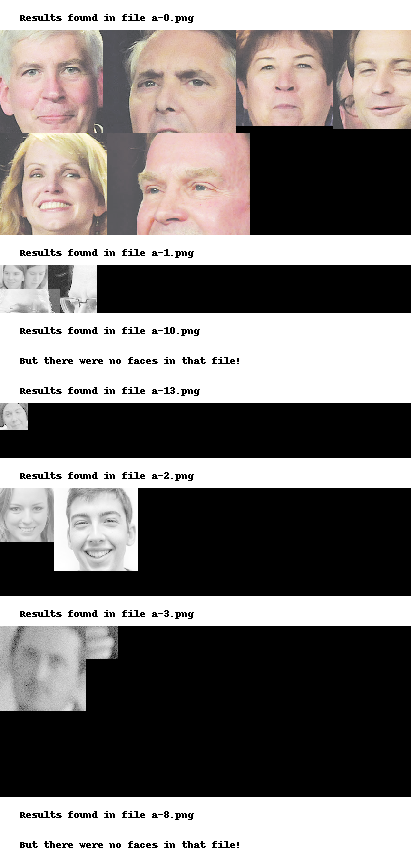

In [7]:
# importing required modules
from zipfile import ZipFile

#SEARCHING FOR CHRISTOPHER IN SMALL IMAGES
# specifying the zip file name
dir_name ='readonly/small_img.zip'

# opening the zip file in READ mode
with ZipFile(dir_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

file = zipfile.ZipFile(dir_name, "r")

list_face_results = []
all_picture_list = []

#******HERE WE ARE GOING TO START LOOPING OVER EACH IMAGE IN THE ZIP DIRECTORY***********
for name in file.namelist():
    data = file.read(name)
    #print (name, len(data), repr(data[:10]))

    
    #USING PYTESSERACT TO MINE TEXT FROM PICTURE
    text = pytesseract.image_to_string(name)
    #print(text[:20])

    #Define function to find faces 
    def wordfinder(word):

        if word in text:
            #print('Yes')
  
            pil_img = Image.open(name)
            pil_img = pil_img.convert('RGB')
            #print(pil_img.mode)

            drawing = ImageDraw.Draw(pil_img)

            #pil_img.show()


            img = cv.imread(name)
            gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(gray, 1.3, 5)

            #print(faces)
            
            if faces is not ():
            
                counter = 0
                for x,y,w,h in faces:
                    drawing.rectangle((x,y,x+w,y+h), outline='white')
                    #cropping out the faces
                    sub_face = img[y:y+h, x:x+w]
                    #writing files names and saving cropped faces
                    fname, ext = os.path.splitext(name)
                    cv.imwrite(fname+"_cropped_"+str(counter)+ext, sub_face)
                    counter += 1
    
                #print(counter)
                #print(fname)
                #print(ext)
                #pil_img.show()

                #load cropped faces from save img files
                img_list = []
                for i in range(counter):
                    cropped_file_name = fname + "_cropped_" + str(i) + ext
                    new_img = Image.open(cropped_file_name)
                    img_list.append(new_img)

                #iterate over cropped faces
                #for img in img_list:
                    #img.show()
                #print(img_list)

            else:
                
                fname, ext = os.path.splitext(name)


            #Title of contact sheet per image processed
            title = 'Results found in file {}.png'.format(fname)

            img_title = Image.new('RGB', (800, 30), (255, 255, 255))
            d = ImageDraw.Draw(img_title)
            d.text((20, 12), title, fill=(0, 0, 0))
            
            
            #*****If loop for when function finds word but no faces****
            if faces is ():

                title2 = 'But there were no faces in that file!'

                img_title2 = Image.new('RGB', (800, 30), (255, 255, 255))
                d2 = ImageDraw.Draw(img_title2)
                d2.text((20, 12), title2, fill=(0, 0, 0))

                #img_title2.show()

                one_picture_list = [img_title, img_title2]

                for pic in one_picture_list:
                    all_picture_list.append(pic)

                #print(all_picture_list)

                return all_picture_list

            #*****This should run when function finds word and faces*****
            else:

                list_of_widths = []
                for pic in img_list:
                    width = pic.width
                    list_of_widths.append(width)

                min_width = min(list_of_widths)

                #print('This is picture {}'.format(fname))
                #print('Min width is :' + str(min_width))
                
                #Creating contact sheet
                first_image=img_list[0]
                if len(img_list) >= 5:
                    contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*4,first_image.height*2))
                    x=0
                    y=0
                else:
                    contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*5,first_image.height*2))
                    x=0
                    y=0
    
                #contact_sheet.show()

                for img2 in img_list:

                    contact_sheet.paste(img2, (x, y) )

                    #update our X position
                    if x+first_image.width >= contact_sheet.width:
                        x=0
                        y=y+first_image.height
                    else:
                        x=x+img2.width

                # resize and display the contact sheet
                contact_sheet = contact_sheet.resize((int(contact_sheet.width/2.1),int(contact_sheet.height/2.1) ))

                #contact_sheet.show()

                one_picture_list = [img_title, contact_sheet]

                for pic in one_picture_list:
                    all_picture_list.append(pic)

                #print(all_picture_list)
            
                return all_picture_list

        else:
            print('Word not found in file')
            
            return all_picture_list

    #Calling wordfinder function inside iteration of zip directory files
    list_face_results = wordfinder('Christopher')
    
    #print(list_face_results)
    #print(type(list_face_results))
   
    
#PUTTING ALL RESULTS TOGETHER IN ONE CONTACT SHEET FOR EACH
    
list_of_heights = []
for pic in list_face_results:
    height = pic.height
    list_of_heights.append(height)

#print(list_of_heights)
total_height = sum(list_of_heights)
#print(total_height)

first_pic = list_face_results[0]
second_pic = list_face_results[1]
third_contact_sheet = PIL.Image.new(first_pic.mode, (second_pic.width, total_height ))
x=0
y=0

for img4 in list_face_results:

    third_contact_sheet.paste(img4, (x,y))

    #update position
    y = y + img4.height

display(third_contact_sheet)


#SEARCHING FOR MARK IN IMAGES
# specifying the zip file name
dir_name ='readonly/images.zip'

# opening the zip file in READ mode
with ZipFile(dir_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

file = zipfile.ZipFile(dir_name, "r")

list_face_results2 = []
all_picture_list = []

#******HERE WE ARE GOING TO START LOOPING OVER EACH IMAGE IN THE ZIP DIRECTORY***********
for name in file.namelist():
    data = file.read(name)
    #print (name, len(data), repr(data[:10]))

    
    #USING PYTESSERACT TO MINE TEXT FROM PICTURE
    text = pytesseract.image_to_string(name)
    #print(text[:20])

    #Calling wordfinder function inside iteration of zip directory files
    list_face_results2 = wordfinder('Mark')
    
    #print(list_face_results2)
    #print(type(list_face_results2))
   
    
#PUTTING ALL RESULTS TOGETHER IN ONE CONTACT SHEET FOR EACH
    
list_of_heights2 = []
for pic in list_face_results2:
    height = pic.height
    list_of_heights2.append(height)

#print(list_of_heights2)
total_height = sum(list_of_heights2)
#print(total_height)

first_pic = list_face_results2[0]
second_pic = list_face_results2[1]
third_contact_sheet2 = PIL.Image.new(first_pic.mode, (second_pic.width, total_height ))
x=0
y=0

for img4 in list_face_results2:

    third_contact_sheet2.paste(img4, (x,y))

    #update position
    y = y + img4.height

display(third_contact_sheet2)